<div align="center">

<table style="width:100%; border:0px; text-align:center;">
  <tr>
    <td align="center" style="width:50%;">
      <img src="https://raw.githubusercontent.com/andreycostalopes/Analise_Exploratoria_BDGD/main/UNIFAP_LOGO.png" width="85" height="95"><br>
      <h2 style="margin-top:5px;">UNIVERSIDADE FEDERAL DO AMAPÁ</h2>
    </td>
    <td align="center" style="width:50%;">
      <img src="https://raw.githubusercontent.com/andreycostalopes/Analise_Exploratoria_BDGD/main/logo_eletrica.png" width="85" height="95"><br>
      <h3 style="margin-top:5px;">- Curso de Engenharia Elétrica</h3>
    </td>
  </tr>
</table>

<h4>Departamento de Ciências Exatas e Tecnológicas – DCET</h4>

---

<h2>🧭 Análise Exploratória da BDGD com Python / GeoPandas</h2>
<h4>Prof. Dr. Andrey Lopes – Universidade Federal do Amapá (UNIFAP)</h4>

</div>

---

# 1. Base de Dados Geográfica da Distribuidora (BDGD)


## 1.1. Definição
A **BDGD (Base de Dados Geográfica da Distribuidora)** é parte integrante do **Sistema de Informação Geográfico Regulatório da Distribuição (SIG-R)**.

- Representa, de forma simplificada, o sistema elétrico real das distribuidoras, refletindo tanto a situação dos ativos quanto as informações técnicas e comerciais de interesse.

- Para garantir a compatibilidade entre as bases submetidas, as distribuidoras devem observar os modelos, requisitos e padrões estabelecidos no **Módulo 10 do PRODIST** ([link](https://www.gov.br/aneel/pt-br/centrais-de-conteudos/procedimentos-regulatorios/prodist)) e no **Manual de Instruções da BDGD** ([link](https://git.aneel.gov.br/publico/centralconteudo/-/raw/main/manuaisminstrucoes/distribuicao/Manual_BDGD_e_ANEXOS.zip)).

- A BDGD é estruturada em **entidades**, modelos abstratos que representam ativos e informações de interesse, incluindo perdas técnicas estimadas. Cada entidade possui atributos que seguem o **Dicionário de Dados ANEEL do SIG-R (DDA)**, assegurando a normalização das informações.

<center>
  <img decoding="async" src=https://raw.githubusercontent.com/andreycostalopes/Analise_Exploratoria_BDGD/main/bdgd_tipo_entidades.png width='300' height='100'>
</center>

- Os dados cartográficos são disponibilizados por distribuidora em **Geodatabase (.gdb)**, contendo as entidades e os campos definidos pelo Manual da BDGD e pelo PRODIST.
---
## 1.2. Módulo 10 do PRODIST
- Institui o **SIG-R (Sistema de Informações Georreferenciadas de Redes de Distribuição)**.  
- Esse módulo contempla:  
  - A **BDGD (Base de Dados Georreferenciada de Distribuição)**;  
  - A **DDA (Dicionário de Dados ANEEL)**.
  
<center>
  <img decoding="async" src='https://raw.githubusercontent.com/andreycostalopes/Analise_Exploratoria_BDGD/main/Diagrama_SIG_R.png' width='500' height='250'>
</center>

---

## 1.3 📌 Linha do Tempo (resumida)
- **1996**: Criação da ANEEL
- **2003–2014**: Ciclos de Revisão Tarifária Periódica (CRTP) (1º ao 4º ciclo), BD em Access/planilhas, metodologias de PT no Módulo 7 do PRODIST, proposta de uso do OpenDSS
- **2008**: Criação do PRODIST (Módulo 7 define PTR)
- **2014**: Inclusão do Módulo 10 (SIG-R) → BDGD
- **2015–Atual**: Consolidação da BDGD como fonte oficial regulatória

---

# 2. Manipulação da BDGD via GeoPandas

A seguir, apresentamos exemplos de acesso e manipulação de dados da rede utilizando o pacote **geopandas**.

## 2.1. Instalando pacotes importantes

In [3]:
!pip install fiona

## 2.2. Importando pacotes basicos
Preparação do ambiente e leitura da BDGD

In [4]:
import fiona
import folium
from folium import plugins
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)

## 2.3 Carregando a BDGD
Definição do caminho da base de dados georeferenciada (BDGD) ([link](https://dadosabertos.aneel.gov.br/dataset/base-de-dados-geografica-da-distribuidora-bdgd)):


In [6]:
bdgd_path = '/content/drive/MyDrive/Colab_Notebooks/BDGD/CEA_Equatorial_31_2024-12-31_V11_20250530-1220.gdb'

## Lista as camadas disponíveis no Geodatabase

In [7]:
import fiona
layers = fiona.listlayers(bdgd_path)
print("Camadas disponíveis:", layers)

Camadas disponíveis: ['ARAT', 'BAR', 'BASE', 'BAY', 'BE', 'CONJ', 'CRVCRG', 'CTAT', 'CTMT', 'EP', 'EQCR', 'EQME', 'EQRE', 'EQSE', 'EQTRAT', 'EQTRM', 'EQTRMT', 'PIP', 'PNT', 'PONNOT', 'PT', 'RAMLIG', 'SEGCON', 'SSDAT', 'SSDBT', 'SSDMT', 'SUB', 'UNCRAT', 'UNCRBT', 'UNCRMT', 'UNREAT', 'UNREMT', 'UNSEAT', 'UNSEBT', 'UNSEMT', 'UNTRMT', 'UNTRAT', 'UCAT_tab', 'UCBT_tab', 'UCMT_tab', 'UGAT_tab', 'UGBT_tab', 'UGMT_tab']


Carregando as tabelas (camadas) de dados:

In [8]:
# Dados base
gdf_base = gpd.read_file(bdgd_path, engine='pyogrio', layer='BASE')
# Dados das Subestações
gdf_sub = gpd.read_file(bdgd_path, engine='pyogrio', layer='SUB')
# Dados dos alimentadores de MT
gdf_ctmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='CTMT')
# Segmentos de linha de MT
gdf_ssdmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='SSDMT')
# Unidades consumidoras de MT
gdf_ucmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='UCMT_tab')
# Unidades consumidoras de BT
gdf_ucbt = gpd.read_file(bdgd_path, engine='pyogrio', layer='UCBT_tab')
# Transformadores de distribuição
gdf_untrmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='UNTRMT')

## 2.4. Explorando as tabelas da BDGD

In [9]:
gdf_base

,DIST,DAT_INC,DAT_FNL,DAT_EXT,DESCR
0,31,01/01/2024,31/12/2024,01/01/2025,Equatorial Energia Amapá


In [10]:
gdf_sub

,COD_ID,DIST,POS,NOME,DESCR,Shape_Length,Shape_Area,geometry
0,POR,31,PD,PORTUARIA,S138-13 POR (EQT),0.001917,1.713565e-07,"MULTIPOLYGON (((-51.182 -0.04838, -51.1822 -0...."
1,PGR,31,PD,PORTO GRANDE,S34-13 PGR (EQT),0.002945,5.008858e-07,"MULTIPOLYGON (((-51.40512 0.70589, -51.40538 0..."
2,TRV,31,PD,TREVO,S34-13 TRV (EQT),0.000683,2.786905e-08,"MULTIPOLYGON (((-50.98619 2.49162, -50.98618 2..."
3,CPX,31,PD,CUPIX,S69-13 CPX (EQT),0.001599,1.663701e-07,"MULTIPOLYGON (((-51.76574 0.61527, -51.76549 0..."
4,APO,31,PD,APOREMA,S13-34 APO (EQT),0.000982,6.011550e-08,"MULTIPOLYGON (((-50.96003 1.2807, -50.95988 1...."
5,CAL,31,PD,CALÇOENE,S69-13 CAL (EQT),0.003602,8.110108e-07,"MULTIPOLYGON (((-50.98684 2.49106, -50.98594 2..."
6,CY1,31,PD,CENTRAL PG,S13-34 CY1 (EQT),0.001769,1.605435e-07,"MULTIPOLYGON (((-51.25836 0.902, -51.25779 0.9..."
7,TAG,31,PD,TARTARUGALZINHO,S138-69 TAG (EQT),0.003636,7.029828e-07,"MULTIPOLYGON (((-50.91934 1.49725, -50.9196 1...."
8,JAR,31,PD,LARANJAL DO JARI,S69-13 JAR (EQT),0.002345,3.314558e-07,"MULTIPOLYGON (((-52.5101 -0.82818, -52.50984 -..."
9,EQT,31,PD,EQUATORIAL,S69-13 EQT (EQT),0.004147,9.853802e-07,"MULTIPOLYGON (((-51.08763 0.0025, -51.08629 0...."


Extraindo a lista de subestações da rede

In [50]:
sub_list = gdf_sub['COD_ID'].tolist()
num_se = gdf_sub['COD_ID'].count()
print('Lista de SE:', sub_list)
print(f'A rede possui {num_se} SE')

Lista de SE: ['POR', 'PGR', 'TRV', 'CPX', 'APO', 'CAL', 'CY1', 'TAG', 'JAR', 'EQT', 'STN', 'AMP', 'MCP', 'SRT', 'NAV', 'LT1', 'SEI', 'RPT', 'CY', 'OYP', 'SJO', 'MOV']
A rede possui 22 SE


Filtra os alimentadores pertencentes à subestação santa rita (COD_ID = SRT)

In [12]:
filtro = gdf_ctmt['SUB']=='SRT'
print(filtro)

0      True
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Name: SUB, Length: 79, dtype: bool


Aplicando o filtro...

In [34]:
alim = gdf_ctmt[filtro]['COD_ID'].to_list()
print('Lista de alimentadores filtrados:', alim)

Lista de alimentadores filtrados: ['SRT01F1', 'SRT01P9', 'SRT01F2', 'SRT01F5', 'SRT01P1', 'SRT01P4', 'SRT01P5', 'SRT01P6', 'SRT01P8', 'SRT01P2', 'SRT01P3']


Forma alternativa para busca de alimentadores

In [36]:
alim = gdf_ctmt.query("SUB == 'SRT'")['COD_ID'].to_list()
print('Lista de alimentadores filtrados:', alim)

Lista de alimentadores filtrados: ['SRT01F1', 'SRT01P9', 'SRT01F2', 'SRT01F5', 'SRT01P1', 'SRT01P4', 'SRT01P5', 'SRT01P6', 'SRT01P8', 'SRT01P2', 'SRT01P3']


Calcula a quantidade de alimentadores por subestação

In [ ]:
gdf_ctmt.groupby('SUB')['COD_ID'].count().reset_index()

,SUB,COD_ID
0,AMP,1
1,CAL,1
2,CPX,3
3,CY,2
4,CY1,1
5,EQT,13
6,JAR,4
7,MCP,11
8,NAV,5
9,OYP,4


In [39]:
gdf = gdf_untrmt.query(f"CTMT=='POR01V2'")
gdf.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_AT,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry
3805,3152474,31,26946-12737408,3152474-12737408V,0,ABC,ABCN,0,AT,38,CS,2,0.22,5H,12,1.0,AN,PT,225.0,560.0,2945.0,16/10/2024,POR01V2,AP-MP-SE-PTU-TRM-TRAF-PUTF5-01,POR,14567,1600600,0,T,0,00390434,UB,POINT (-51.15586 -0.05149)
3806,3152476,31,26946-12737308,3152476-12737308V,0,ABC,ABCN,0,AT,38,CS,2,0.22,5H,12,1.0,AN,PT,112.5,335.0,1705.0,03/11/2022,POR01V2,AP-MP-SE-PTU-TRM-TRAF-PUTF5-01,POR,14567,1600600,0,T,0,00390684,UB,POINT (-51.15408 -0.05071)
3807,3152477,31,26946-12737357,3152477-12737357V,0,ABC,ABCN,0,AT,38,CS,2,0.22,3H,12,1.0,AN,PT,75.0,255.0,1260.0,03/11/2022,POR01V2,AP-MP-SE-PTU-TRM-TRAF-PUTF5-01,POR,14567,1600600,0,T,0,00302500,UB,POINT (-51.17443 -0.05347)
3808,3152480,31,26946-12941502,3152480-12941502V,0,ABC,ABCN,0,AT,38,CS,2,0.22,3H,12,1.0,AN,PT,75.0,255.0,1260.0,03/11/2022,POR01V2,AP-MP-SE-PTU-TRM-TRAF-PUTF5-01,POR,14567,1600600,0,T,0,00390336,UB,POINT (-51.16379 -0.05341)
3809,3152483,31,26946-12737457,3152483-12737457V,0,ABC,ABCN,0,AT,38,CS,2,0.22,5H,12,1.0,AN,PT,112.5,335.0,1705.0,03/11/2022,POR01V2,AP-MP-SE-PTU-TRM-TRAF-PUTF5-01,POR,14567,1600600,0,T,0,00399404,UB,POINT (-51.17875 -0.05252)


Manipulando tabelas de unidades consumidoras de BT

In [51]:
gdf_ucbt.head()

,DIST,PAC,RAMAL,PN_CON,UNI_TR_MT,CTMT,UNI_TR_AT,SUB,CONJ,MUN,CEG_GD,BRR,CEP,CLAS_SUB,CNAE,TIP_CC,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,SIT_ATIV,DAT_CON,CAR_INST,LIV,ARE_LOC,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,DIC_01,DIC_02,DIC_03,DIC_04,DIC_05,DIC_06,DIC_07,DIC_08,DIC_09,DIC_10,DIC_11,DIC_12,FIC_01,FIC_02,FIC_03,FIC_04,FIC_05,FIC_06,FIC_07,FIC_08,FIC_09,FIC_10,FIC_11,FIC_12,SEMRED,DESCR,TIP_SIST,COD_ID
0,31,319546PE,16059398RM,114201384,3158469,SJO01S2,AP-MP-SE-SJO-TRM-TRAF-02T1,SJO,14566,1600303,,CENTRAL,68900-095,RE1,,RES-Tipo1,ABN,BT,10,B1,AT,01/08/2024,0.29664,0,UB,0.00,0.00,0.00,0.00,0.0,0.00,0.00,81.0,361.46,99.84,88.56,32.96,0.0,0.00,0.00,0.0,0.0,0.00,1.78,0.00,0.0,1.74,3.94,6.72,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,0,,RD_INTERLIG,c76f5e8347806af904e0de8cfe37a7a72a6b8ce4ed135c...
1,31,138477PE,15877942RM,114200953,3158532,SJO01S2,AP-MP-SE-SJO-TRM-TRAF-02T1,SJO,14566,1600303,,CENTRAL,68900-020,RE1,,RES-Tipo1,BN,BT,10,B1,AT,01/07/2024,0.00000,0,UB,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,1.08,1.52,0.0,0.0,0.75,1.78,0.37,0.0,1.26,0.00,0.00,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0,,RD_INTERLIG,0320d1efa8282a3479fcdb189412df17fab2802b13ae0e...
2,31,1178403PE,16934918RM,114068843,3144987,OYP01Y2,,OYP,14568,1600501,,MANGA,68980-000,RE2,,RES-Tipo8,AN,BT,6,B1BR,AT,30/11/2024,0.00000,0,UB,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,27.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,,RD_INTERLIG,643b47583dce9e2da0121794f671b5d5c39c2665e9d283...
3,31,298789PE,16038641RM,114197667,3158002,SJO01S3,AP-MP-SE-SJO-TRM-TRAF-02T1,SJO,14566,1600303,,LAGUINHO,68908-181,RE1,,RES-Tipo9,ABN,BT,10,B1,AT,01/07/2024,3.64104,0,UB,527.88,549.92,478.17,404.56,533.0,552.26,573.21,602.0,627.52,566.80,583.20,555.17,0.0,4.47,0.00,0.0,0.0,0.75,7.67,0.00,0.0,0.09,0.82,0.00,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0,,RD_INTERLIG,46a568d5c0321d1a5adf314caae54b69156b550343f22b...
4,31,298790PE,16038642RM,114197667,3158002,SJO01S3,AP-MP-SE-SJO-TRM-TRAF-02T1,SJO,14566,1600303,,LAGUINHO,68908-181,RE1,,RES-Tipo9,ABN,BT,10,B1,DS,01/07/2024,3.18888,0,UB,933.86,891.52,823.68,898.56,855.0,885.10,890.01,1013.0,1111.94,992.16,930.96,354.32,0.0,4.47,7.12,0.0,0.0,0.75,7.67,0.00,0.0,0.09,0.82,0.00,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0,,RD_INTERLIG,18101826aa7137a04132f6642b6d9956f10af45ff14deb...


In [52]:
gdf_ucbt.query(f"CTMT=='POR01V2'").groupby('FAS_CON', as_index=False)['COD_ID'].count()

,FAS_CON,COD_ID
0,ABCN,230
1,ABN,1355
2,AN,1001
3,BCN,394
4,BN,383
5,CAN,238
6,CN,338


In [53]:
gdf_ssdmt.query("FAS_CON=='A' or FAS_CON=='B' or FAS_CON=='C'").groupby(['SUB', 'CTMT', 'TIP_INST'])['COD_ID'].count()

SUB  CTMT     TIP_INST  
AMP  AMP01Y2  RD_AER_RUR    1425
              RD_AER_URB      23
APO  TAG01Y1  RD_AER_RUR     448
CAL  CAL01C1  RD_AER_RUR    1174
              RD_AER_URB      29
                            ... 
TAG  TAG01Y1  RD_AER_URB      88
     TAG01Y2  RD_AER_RUR    1240
              RD_AER_URB      86
TRV  CAL01C1  RD_AER_RUR     289
              RD_AER_URB       9
Name: COD_ID, Length: 97, dtype: int64

## 2.5. Plotando as Entidades Geográficas da BDGD

Plotagem de segmentos de de linha de MT

<Axes: >

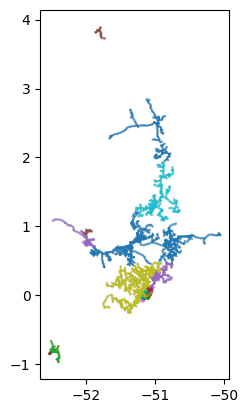

In [19]:
gdf_ssdmt.plot(column='SUB')  # Segmentação de cores por SE
#gdf_ssdmt.plot(column='CTMT')  # Segmentação de cores por Circuito de MT

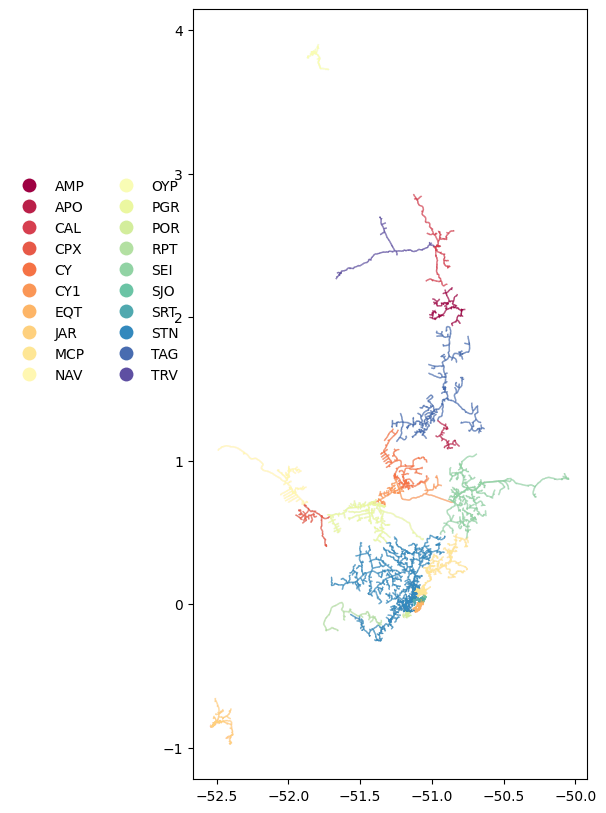

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_ssdmt.plot(column='SUB',
               legend=True,
               legend_kwds={'loc': 'lower right',
                            'bbox_to_anchor':(0, .5),
                            'ncols': 2,
                            'frameon':False},
               linewidth=1.0, categorical=True, cmap='Spectral', ax=ax
               )
fig.show()

filtra e plota segmentos linha pertencentes à subestação 'SRT'


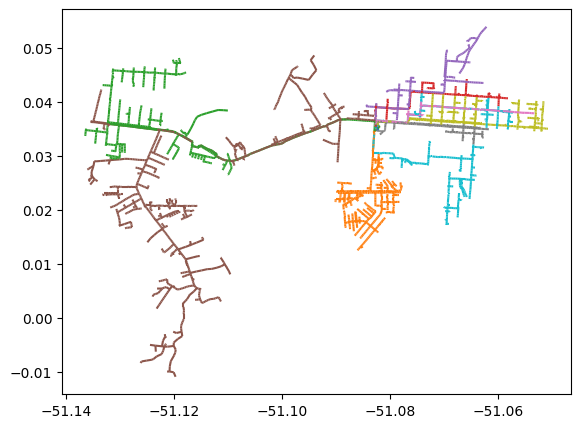

In [26]:
fig, ax = plt.subplots(figsize=(16,5))
gdf_ssdmt.query("SUB=='SRT'").plot(ax=ax, column='CTMT')
gdf_sub[gdf_sub['COD_ID']=='SRT'].plot(ax=ax)
plt.show()

filtra e plota segmentos linha pertencentes ao alimentador 'SRT01P8'

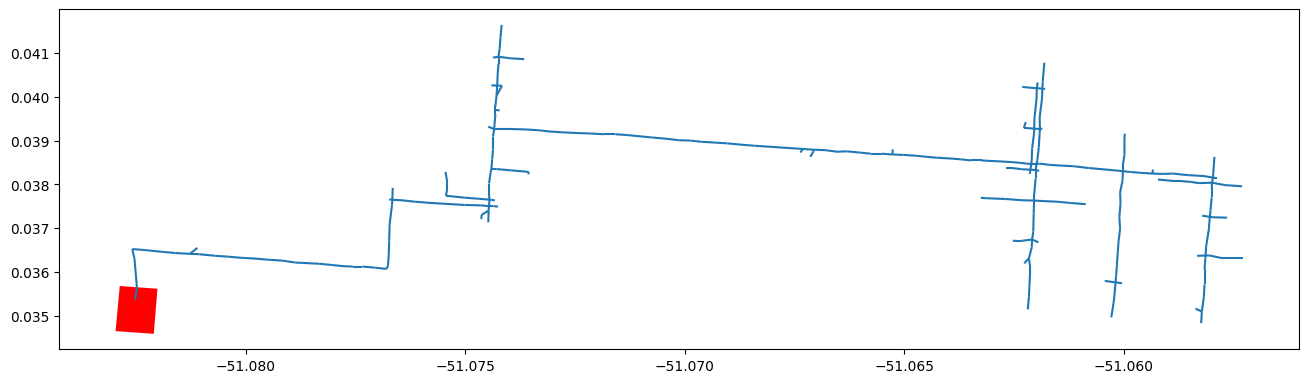

In [25]:
fig, ax = plt.subplots(figsize=(16,5))
gdf_ssdmt.query("CTMT=='SRT01P8'").plot(ax=ax) # filtra segmentos linha pertencentes ao alimentador 'SRT01P8'
gdf_sub[gdf_sub['COD_ID']=='SRT'].plot(ax=ax, color='red')
plt.show()

## Extraindo dados de Curvas de Carga

In [41]:
# Curvas de Cargas
gdf_crvcrg = gpd.read_file(bdgd_path, engine='pyogrio', layer='CRVCRG')

In [42]:
gdf_crvcrg

,COD_ID,DIST,TIP_DIA,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96,DESCR,GRU_TEN
0,MT-Tipo6,31,SA,474.501175,417.600313,373.463997,363.427995,365.224369,356.557587,362.951566,355.904908,356.926525,347.011894,349.154594,348.953048,329.907169,326.264428,327.807911,325.986841,329.163158,327.369489,323.964236,320.428257,309.610749,311.846782,321.096145,321.038040,302.610229,296.844866,310.243401,322.694285,331.820113,381.044519,431.777907,443.460211,532.219421,572.554437,578.080031,606.032901,643.465121,807.503180,1328.604834,1935.686891,2312.468796,2270.628600,2407.338054,2718.566470,2797.235039,2796.589074,2775.226503,2745.604384,2691.988409,2689.417526,2802.244986,2827.130260,2795.822228,2826.808818,2873.095778,2886.735841,3042.761395,3078.922116,3088.226098,3104.995103,3106.553361,3145.681579,3121.480173,3130.050086,3093.670218,3093.736350,3072.871673,2991.329547,3145.350891,3150.446256,3452.915918,3487.703501,3442.980161,3381.572625,3279.761556,3171.085076,3178.590169,3161.676907,3167.258910,3157.597842,3129.540023,3121.361678,3131.587446,3096.670652,3049.629743,2865.426089,2592.160547,2311.233964,1806.571428,1159.901928,922.315938,742.694945,712.713513,648.734020,626.659323,614.971644,,MT
1,RES-Tipo4,31,DO,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.599540,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.101260,3941.570515,3094.338000,3260.615375,3791.006901,3429.765079,3402.047321,3864.593510,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.350470,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738,,BT
2,COM-Tipo5,31,DO,907.251017,879.405019,762.441410,793.268014,789.786795,799.100178,768.247103,774.306114,753.080590,780.212951,773.273058,753.720871,715.856736,751.213649,751.016294,771.709787,742.013441,745.700040,722.800257,773.848897,771.605042,768.980349,755.041179,750.395133,782.861463,919.221065,1096.894004,1107.480557,1081.713548,1212.269333,1259.702209,1192.703261,1188.297744,1282.865898,1308.522131,1316.730715,1438.317002,1296.476362,1212.421987,1224.154133,1243.636068,1250.840443,1249.615514,1243.892973,1229.907512,1234.837149,1256.492678,1192.439745,1114.122563,1217.894480,1104.471703,1044.197185,953.782537,813.465120,797.003076,753.672962,894.187340,806.744871,835.060164,834.826428,781.573290,750.305979,786.765509,759.238871,899.975910,1046.847605,1036.401216,1023.163619,960.717761,948.188483,942.145297,949.489287,1125.091899,1193.025315,1120.547728,1091.626964,1094.955388,1113.637781,1036.464991,923.041130,929.353464,890.083022,837.310519,846.328120,843.806318,7

In [43]:
#gdf_crvcrg[gdf_crvcrg['COD_ID']=='RES-Tipo4']
gdf_crvcrg.query("COD_ID=='RES-Tipo4'")

,COD_ID,DIST,TIP_DIA,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96,DESCR,GRU_TEN
1,RES-Tipo4,31,DO,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.599540,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.101260,3941.570515,3094.338000,3260.615375,3791.006901,3429.765079,3402.047321,3864.593510,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.350470,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738,,BT
40,RES-Tipo4,31,DU,8026.708535,7812.012871,7479.559913,7619.046577,7472.195015,7437.010338,7788.016426,7738.667122,8054.353218,7874.811318,7822.279350,7717.199959,7564.962593,8049.884026,8032.743080,7812.763161,7864.118019,7879.541802,8050.056465,8110.352150,8155.117272,7706.255104,7432.768623,7225.932685,7089.282584,6301.720145,5935.226463,5591.366400,4588.468480,4346.763260,3524.218479,2843.258696,2817.874007,3042.160659,2719.042300,2315.335604,2122.616898,1670.281755,1615.851213,1567.150032,1745.320066,2574.409440,2987.450046,3146.177701,3677.485103,3728.251652,3515.480642,3213.455610,2961.610009,3085.385610,3887.961037,5572.895170,6838.655822,7318.009956,8076.598755,8149.189865,8463.479829,8748.515695,8330.518792,6540.027152,6889.297462,7581.827316,7432.125969,7597.309913,7838.912438,7249.950691,6070.252585,5917.580542,5195.129217,5351.327539,4974.244531,5042.171903,5405.800863,5431.899168,6323.487723,6867.167121,7384.989112,9068.962945,9545.296869,9446.167291,8291.069817,8240.440712,8043.129402,8635.911202,8992.522088,9074.900583,10163.564555,9254.502374,9062.718606,9167.583383,9096.275430,8374.970727,7804.565727,8096.927025,7800.245750,7703.209679,,BT
64,RES-Tipo4,31,SA,7504.733070,8529.214776,8121.840279,8370.350442,8147.801766,8467.258324,8565.170571,8478.326272,8210.619912,8372.629586,8210.594490,8318.956673,8070.846215,7928.475960,8048.163369,7808.435188,7762.114357,8043.778420,7220.705543,7540.342750,7284.817878,7276.975318,7264.636283,7118.090888,6621.900763,5786.534674,5566.181814,5305.825857,4659.728452,5201.373220,4745.152577,4550.064885,4536.632069,4767.001775,4939.849340,4756.817113,4997.995549,5328.892080,5633.639410,4342.072026,3890.238392,3678.796398,4050.335087,5729.277861,6111.386137,6159.607691,6330.515025,5608.770895,5661.690134,4897.436196,5381.286150,5461.753618,6033.762823,5893.604323,5792.008308,5232.139776,4649.543525,4804.279197,5292.019081,5718.736915,5292.967887,6395.142462,6093.361885,5965.318689,5919.923025,6362.466635,6021.683237,5225.632667,5189.838325,4978.778157,4618.934668,4178.797560,3909.273865,4698.059647,5267.322080,5168.469556,5625.099541,

In [44]:
cols = [f'POT_{i:02d}' for i in range(1,97)]
print(cols)

['POT_01', 'POT_02', 'POT_03', 'POT_04', 'POT_05', 'POT_06', 'POT_07', 'POT_08', 'POT_09', 'POT_10', 'POT_11', 'POT_12', 'POT_13', 'POT_14', 'POT_15', 'POT_16', 'POT_17', 'POT_18', 'POT_19', 'POT_20', 'POT_21', 'POT_22', 'POT_23', 'POT_24', 'POT_25', 'POT_26', 'POT_27', 'POT_28', 'POT_29', 'POT_30', 'POT_31', 'POT_32', 'POT_33', 'POT_34', 'POT_35', 'POT_36', 'POT_37', 'POT_38', 'POT_39', 'POT_40', 'POT_41', 'POT_42', 'POT_43', 'POT_44', 'POT_45', 'POT_46', 'POT_47', 'POT_48', 'POT_49', 'POT_50', 'POT_51', 'POT_52', 'POT_53', 'POT_54', 'POT_55', 'POT_56', 'POT_57', 'POT_58', 'POT_59', 'POT_60', 'POT_61', 'POT_62', 'POT_63', 'POT_64', 'POT_65', 'POT_66', 'POT_67', 'POT_68', 'POT_69', 'POT_70', 'POT_71', 'POT_72', 'POT_73', 'POT_74', 'POT_75', 'POT_76', 'POT_77', 'POT_78', 'POT_79', 'POT_80', 'POT_81', 'POT_82', 'POT_83', 'POT_84', 'POT_85', 'POT_86', 'POT_87', 'POT_88', 'POT_89', 'POT_90', 'POT_91', 'POT_92', 'POT_93', 'POT_94', 'POT_95', 'POT_96']


In [45]:
gdf_crvcrg.query("TIP_DIA=='DO' and COD_ID=='RES-Tipo4'")[cols]

,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96
1,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.59954,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.10126,3941.570515,3094.338,3260.615375,3791.006901,3429.765079,3402.047321,3864.59351,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.35047,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738


In [46]:
cols = [f'POT_{i:02d}' for i in range(1,97)]
p_do = gdf_crvcrg.query("TIP_DIA=='DO' and COD_ID=='RES-Tipo4'")[cols].values[0,:]
p_du = gdf_crvcrg.query("TIP_DIA=='DU' and COD_ID=='RES-Tipo4'")[cols].values[0,:]
p_sa = gdf_crvcrg.query("TIP_DIA=='SA' and COD_ID=='RES-Tipo4'")[cols].values[0,:]

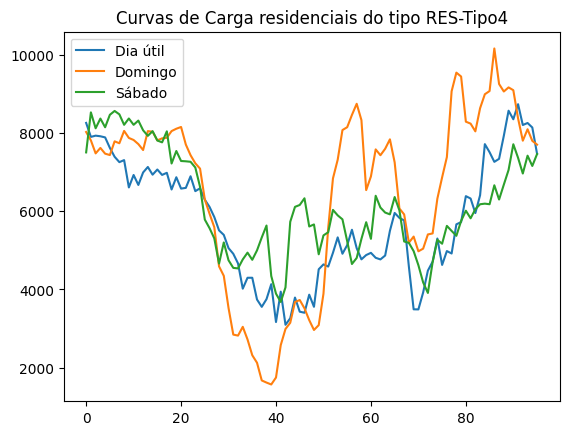

In [54]:
plt.plot(p_do, label='Dia útil')
plt.plot(p_du, label='Domingo')
plt.plot(p_sa, label='Sábado')
plt.title('Curvas de Carga residenciais do tipo RES-Tipo4')
plt.legend()

---
## REFERÊNCIA PARA CITAÇÃO:
@misc{Lopes2025,
  author = {Lopes, A.C.},
  title = {Analise Exploratória BDGD},
  year = {2025},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{https://github.com/andreycostalopes/Analise_Exploratoria_BDGD/blob/main/BDGD.ipynb}},
  commit = {ff9348f6be3a5dad4cb45a94842dd7eceb994dea}
}

---
A.C. Lopes, Análise Exploratória BDGD, (2025), GitHub repository, https://github.com/andreycostalopes/Analise_Exploratoria_BDGD/blob/main/BDGD.ipynb

---
## REFERÊNCIAS BIBLIOGRÁFICAS:


1.   ANEEL, Regras e Procedimentos de Distribuição (Prodist): MÓDULO 10 - SISTEMA DE INFORMAÇÃO GEOGRÁFICA REGULATÓRIO. <<https://www.gov.br/aneel/pt-br/centrais-de-conteudos/procedimentos-regulatorios/prodist>>
2.   ANEEL, Manual de Instruções da Base de Dados Geográfica da Distribuidora – BDGD. <<https://git.aneel.gov.br/publico/centralconteudo/-/raw/main/manuaisminstrucoes/distribuicao/Manual_BDGD_e_ANEXOS.zip>>
3.   ANEEL, Base de Dados Geográfica da Distribuidora - BDGD. <<https://dadosabertos.aneel.gov.br/dataset/base-de-dados-geografica-da-distribuidora-bdgd>>

